# Exploratory Data Analysis

We will first analyze the structure of the data, including which features to include, correlation between various features and target, dropping records with null values, encoding string columns and engineering new features.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
data = pd.read_csv("../Data/housing.csv")

In [19]:
data.describe()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Encoding ocean_proximity into different column with true false value..

In [20]:
data = pd.get_dummies(data, columns=['ocean_proximity'])
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [21]:
data.duplicated().sum() #no duplicate rows

np.int64(0)

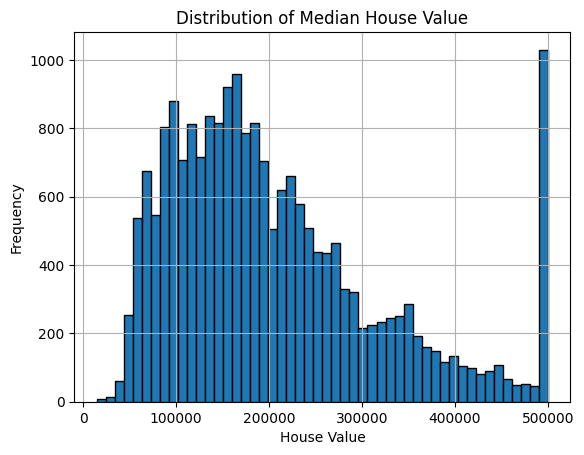

In [22]:
plt.hist(data["median_house_value"], bins=50, edgecolor='k')
plt.title("Distribution of Median House Value")
plt.xlabel("House Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


As we can see the House value is capped at 500000 in the dataset giving an abnormally large number of houses at that value. Keeping these in the dataset is going to rig the model giving wrong judgement. It is also worth noting that the distribution is kind of gaussian (excluding the capped bar) There is a large number of people with their house value around 150000 and the frequency plummets as we move to either of the extremes.

We also notice that there are null values in total_bedroom feature, so to avoid such a data we will drop all the rows not having the total_bedroom feature.

In [24]:
data = data[data["median_house_value"] < 500001] # to remove all capped data
data = data.dropna(subset=["total_bedrooms"]) # to drop all rows having total_bedrooms feature as NULL
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000
mean,-119.564306,35.653372,28.378074,2620.491142,539.645751,1440.290732,501.093504,3.676739,192444.651913
std,2.006241,2.150250,12.515373,2184.938093,422.413200,1144.399323,383.206416,1.569263,97702.625782
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,796.000000,282.000000,2.526500,116500.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1178.000000,411.000000,3.451900,173800.000000
75%,-117.990000,37.730000,37.000000,3118.000000,648.000000,1743.000000,606.000000,4.583300,248100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000


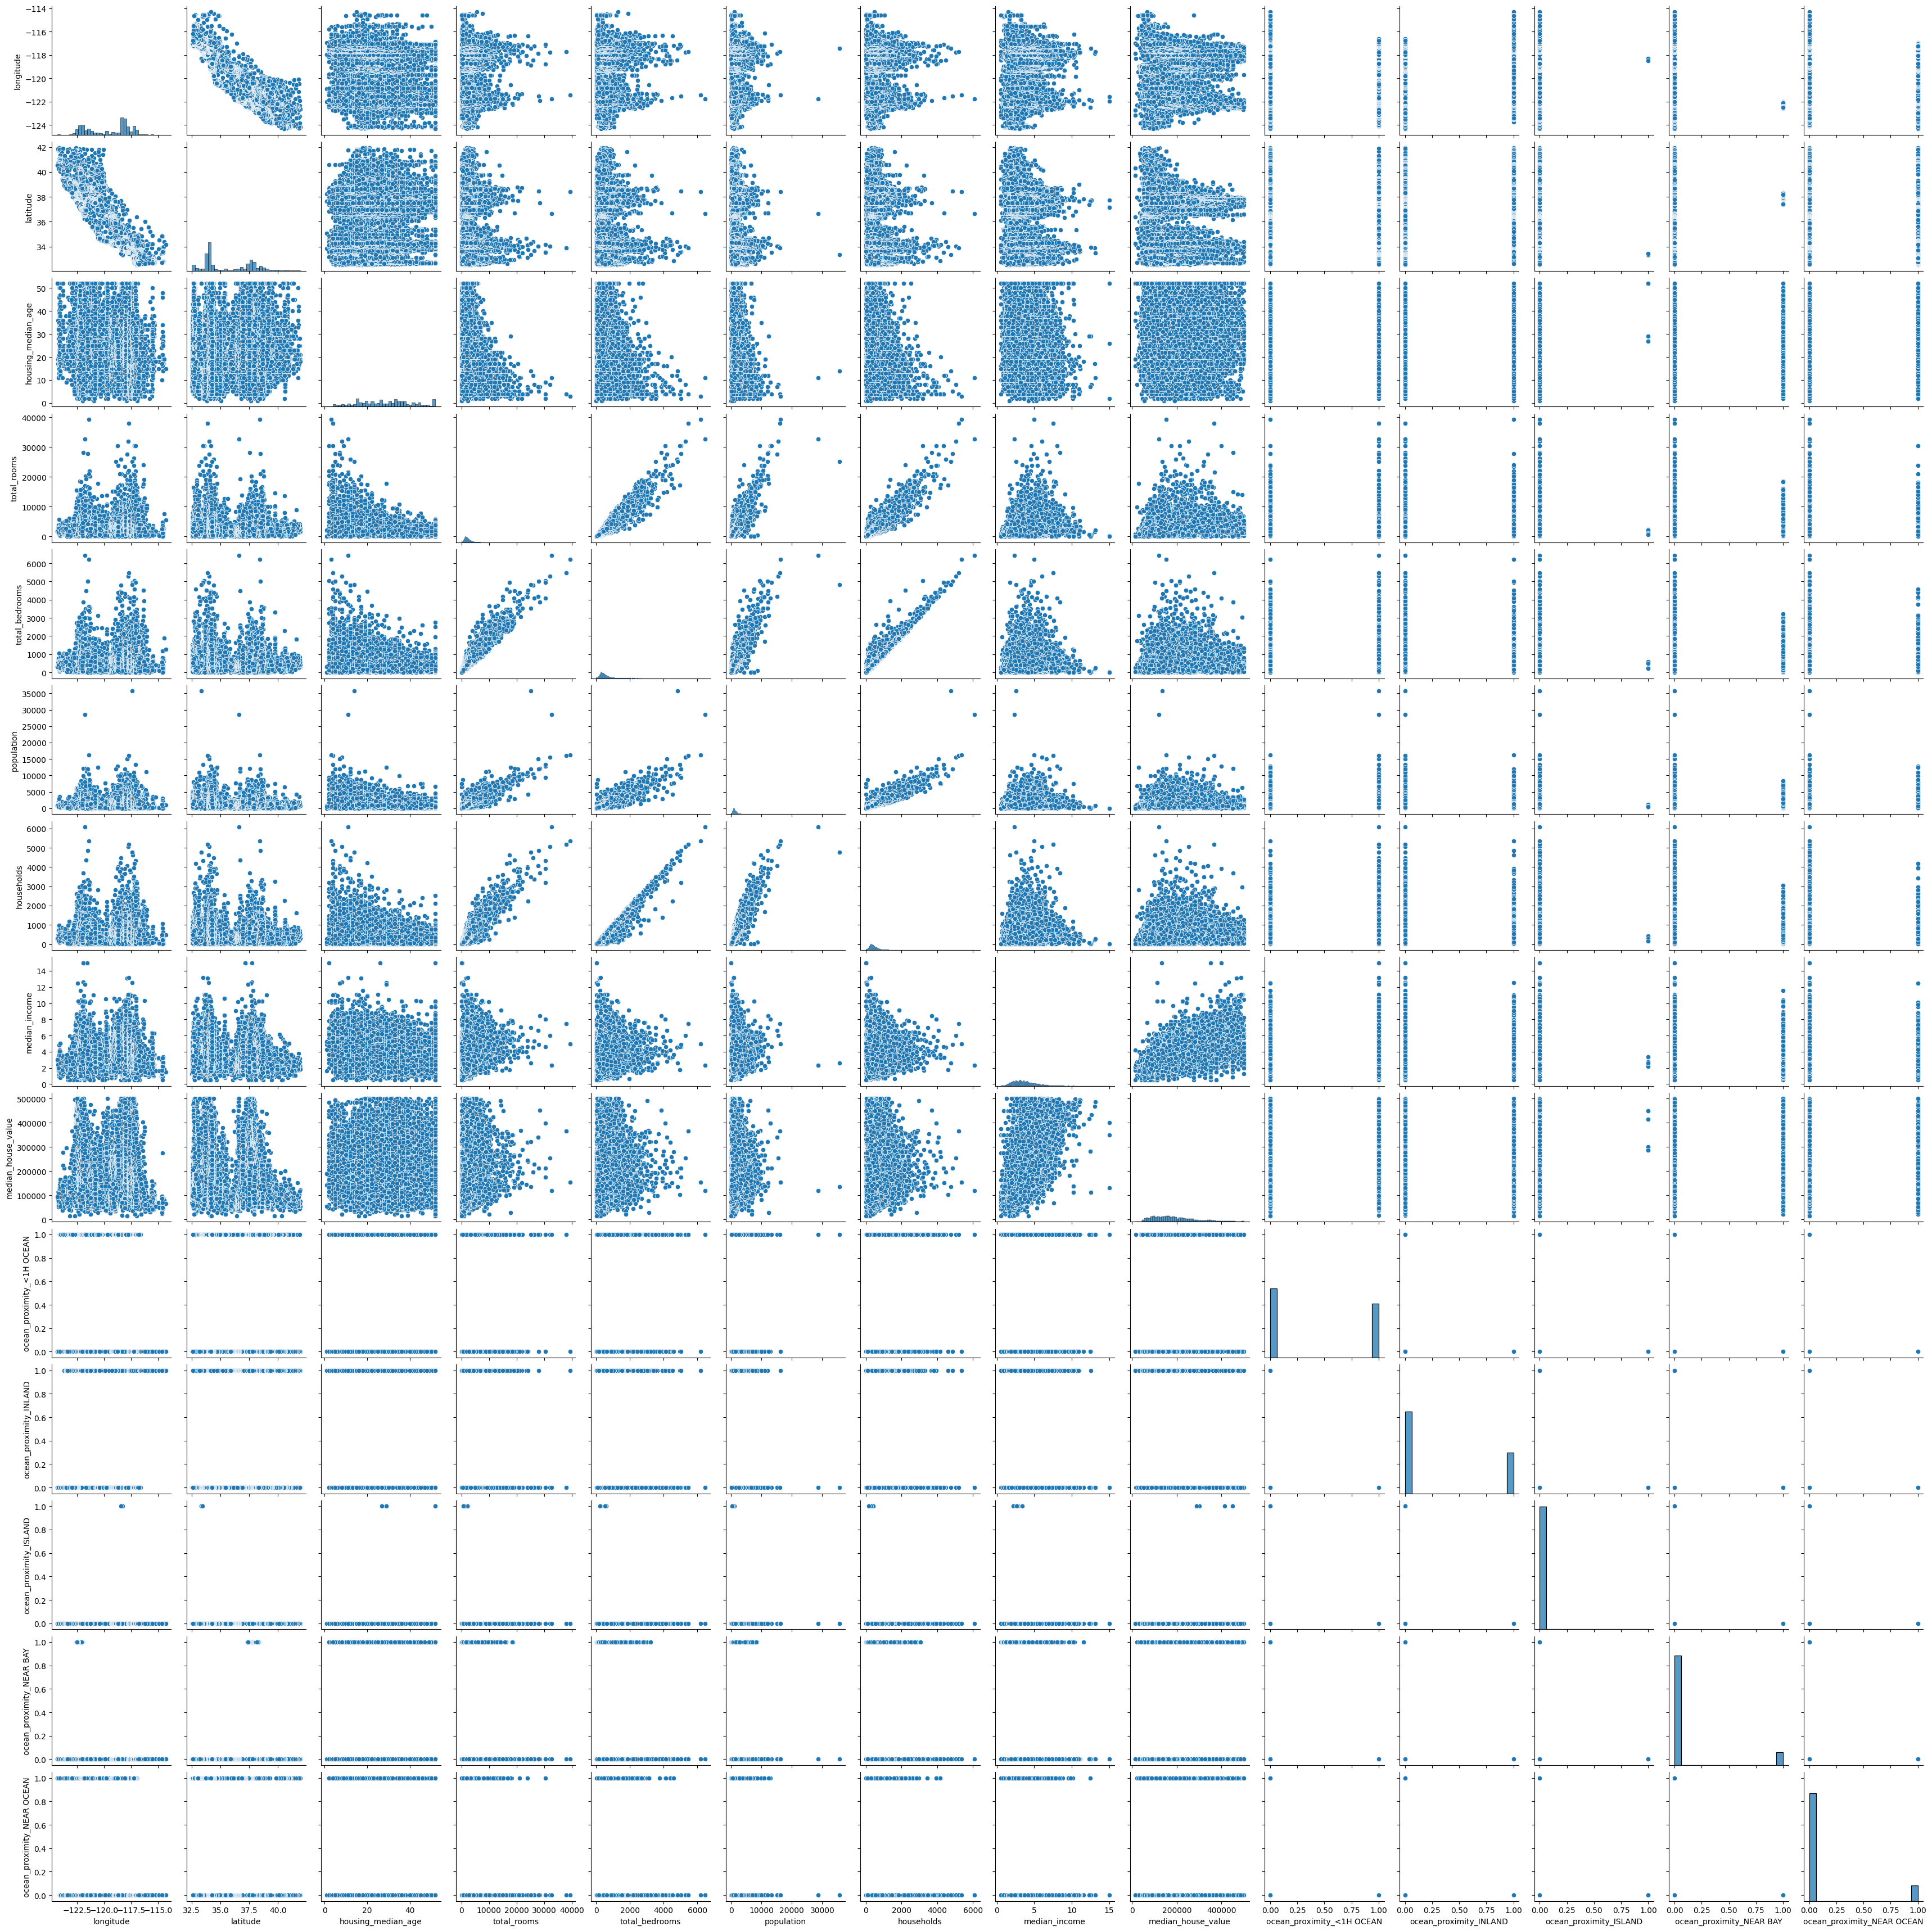

In [25]:
sns.pairplot(data)

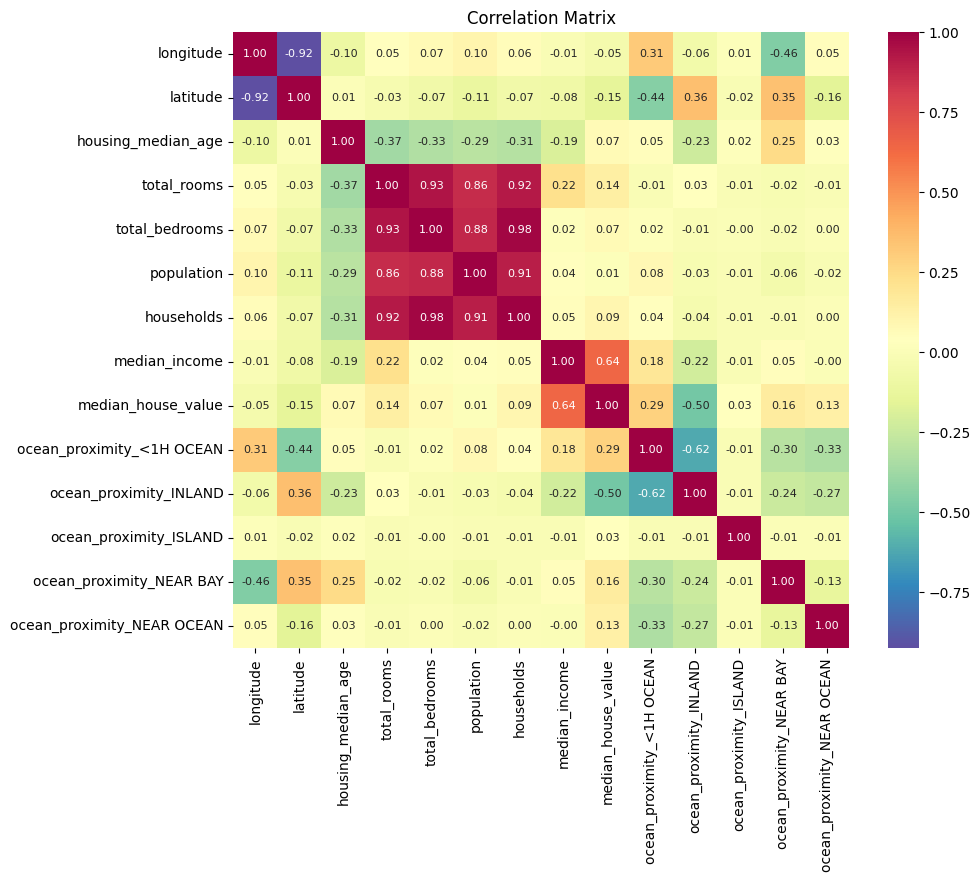

In [26]:
corrmat = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, 
            cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2f', 
            annot_kws={'size': 8}, 
            cmap="Spectral_r")
plt.title("Correlation Matrix")
plt.show()

There are certain conclusion we can draw from these graphs.

1) Median income is the strongest predictor. No other feature even comes close.
2) Geography (i.e latitude and longitude) are weakly related to the price.
3) Total rooms, bedrooms, population and households are almost perfectly inter‑correlated indicating that most of these are not adding much extra information.
4) Ocean_proximity inland and 1H_Ocean are affecting the median house value moderately.

### Creating features

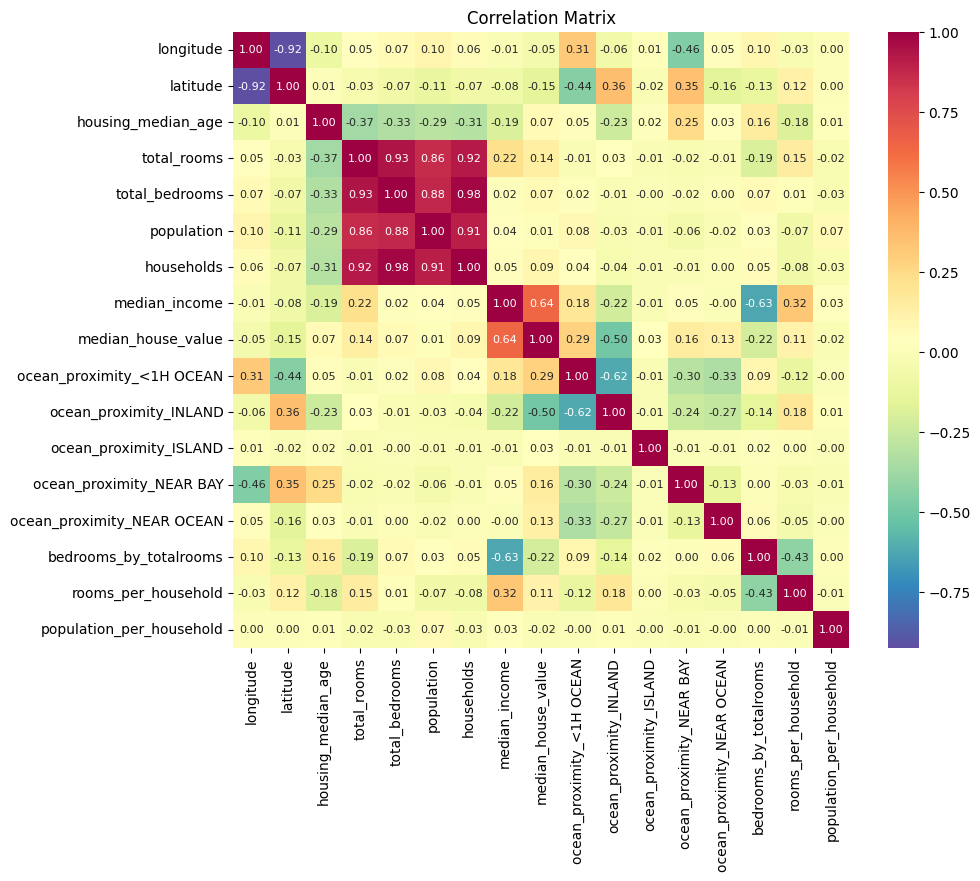

In [ ]:
data["bedrooms_by_totalrooms"] = data["total_bedrooms"]/data["total_rooms"] # To deal with correlation between those 4 features
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["population_per_household"] = data["population"]/data["households"]
corrmat = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corrmat, 
            cbar=True, 
            annot=True, 
            square=True, 
            fmt='.2f', 
            annot_kws={'size': 8}, 
            cmap="Spectral_r")
plt.title("Correlation Matrix")
plt.show()

## Final Words

Our final insights from this analysis are that we would be using the following features in our model -:

a) median_income <br>
b) ocean_proximity_<1H_OCEAN <br>
c) ocean_proximity_INLAND <br>
d) bedrooms_by_totalrooms <br>


In short, we have chosen all those features showing a correlation of 0.2 or above to be used in the model.
